In [1]:
from keras.utils import normalize
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import sys
import time

from tensorflow import keras
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU

Segmentation Models: using `tf.keras` framework.


In [2]:
sys.path.extend(['..'])
from data.adv_data_generator import ImageLoader

file = ["test"]
type_mod = ["images","masks"]
dataset = [[],[]]
num = 0
for i in file:
    for j in type_mod:
        loader = ImageLoader(i, j)
        dataset[num] = loader.loadData()
        num += 1

test_img = dataset[0]
test_mask = dataset[1]

In [13]:
import random

'''
(1) Set the seed
(2) Generate a random permutation of indices
(3) Use the same random indices for sampling both arrays
'''

def sampling(img, mask, seed, percentage=0.2):
    sample_size = int(len(img) * percentage)
    random.seed(seed)
    random_indices = random.sample(range(len(img)), sample_size)
    sample_img = img[random_indices]
    sample_mask = mask[random_indices]

    return sample_img, sample_mask

sam_test_img, sam_test_mask = sampling(test_img, test_mask, 7)

In [7]:
dir = os.path.abspath('C:/Users/kholid/Semantic Segmentation/architecture')
sys.path.append(dir)
from USegNet_Base import usegnet_base
from USegNet_Mod import usegnet_mod

In [8]:
base = usegnet_base(8, 64, 64, 3)
mod = usegnet_mod(8, 64, 64, 3)
aug = usegnet_mod(8, 64, 64, 3)

In [38]:
base.load_weights('model_usegnet_default_checkpoint.weights.h5')
mod.load_weights('model_usegnet_checkpoint.weights.h5')
aug.load_weights('model_usegnet_augmented_checkpoint.weights.h5')

In [20]:
y_test_cat.shape

(6415, 64, 64, 8)

In [23]:
from keras.utils import to_categorical
X_test, y_test = sam_test_img, sam_test_mask
y_test_cat = to_categorical(y_test, num_classes=8)
# Predict and evaluate
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=-1)
y_true_classes = y_test
# Flatten the arrays
# y_pred_flat = y_pred_classes.flatten()
# y_true_flat = y_true_classes.flatten()

In [39]:
y_pred_base = base.predict(X_test)
y_pred_classes_base = np.argmax(y_pred_base, axis=-1)
y_pred_flat_base = y_pred_classes_base.flatten()
y_true_flat_base = y_true_classes.flatten()

201/201 ━━━━━━━━━━━━━━━━━━━━ 75s 372ms/step


In [26]:
y_pred_mod = mod.predict(X_test)
y_pred_classes_mod = np.argmax(y_pred_mod, axis=-1)
y_pred_flat_mod = y_pred_classes_mod.flatten()
y_true_flat_mod = y_true_classes.flatten()

201/201 ━━━━━━━━━━━━━━━━━━━━ 83s 415ms/step


In [27]:
y_pred_aug = aug.predict(X_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=-1)
y_pred_flat_aug = y_pred_classes_aug.flatten()
y_true_flat_aug = y_true_classes.flatten()

201/201 ━━━━━━━━━━━━━━━━━━━━ 85s 418ms/step


In [63]:
from matplotlib.colors import LinearSegmentedColormap

def show_maps(n_images=5, SIZE=(20,10), ALPHA=0.5, explain=False):
    colors = ['#00FFFF',  '#FFA500', '#FFFF00', '#008000', '#FF0000','#0000FF', '#FF00FF', '#800080']
    cmap_name = 'custom_cmap'
    custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)
    # plot Configurations
    n_cols = 5
    
    # Create N plots where N = Number of Images
    for image_no in range(n_images):

        # Figure Size
        plt.figure(figsize=SIZE)

        # Select Image and Label Map 
        id = np.random.randint(len(X_test))
        ori, label, base, mod, aug = X_test[id], y_test[id], y_pred_classes_base[id], y_pred_classes_mod[id], y_pred_classes_aug[id]

        # Plot Image 
        plt.subplot(1, n_cols, 1)
        plt.imshow(ori)
        plt.title("Original Image")
        plt.axis('off')

        # Plot Label Map
        plt.subplot(1, n_cols, 2)
        plt.imshow(label, cmap=custom_cmap)
        plt.title('Label')
        plt.axis('off')
        
        # Plot Label Map
        plt.subplot(1, n_cols, 3)
        plt.imshow(base, cmap=custom_cmap)
        plt.title('U-segNet')
        plt.axis('off')

        # Plot Label Map
        plt.subplot(1, n_cols, 4)
        plt.imshow(mod, cmap=custom_cmap)
        plt.title('Modifikasi U-SegNet')
        plt.axis('off')

        # Plot Label Map
        plt.subplot(1, n_cols, 5)
        plt.imshow(aug, cmap=custom_cmap)
        plt.title('Modifikasi U-SegNet + Augmentasi')
        plt.axis('off')

            # Plot Mixed Overlap
            # plt.subplot(1, n_cols, 3)
            # plt.imshow(image)
            # plt.imshow(label_map, alpha=0.5)
            # plt.title("Overlap")
            # plt.axis('off')

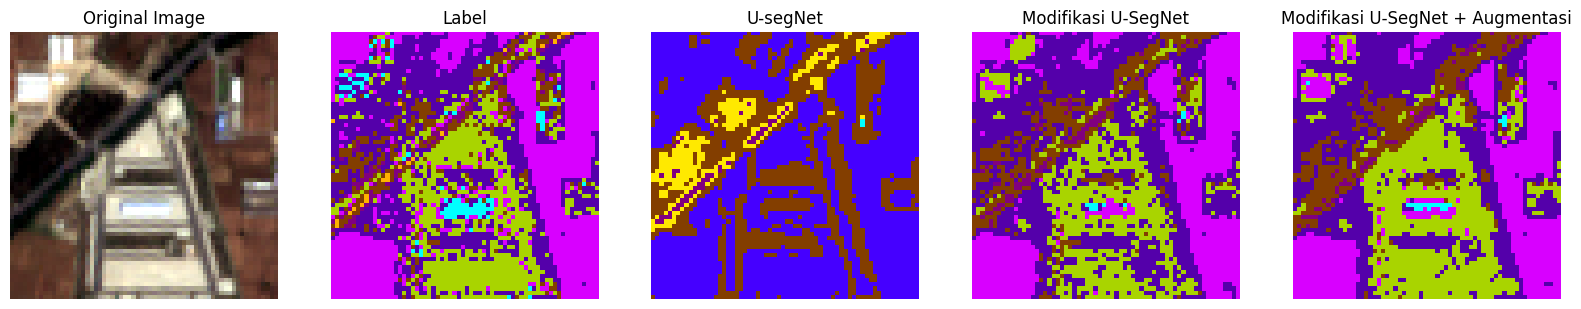

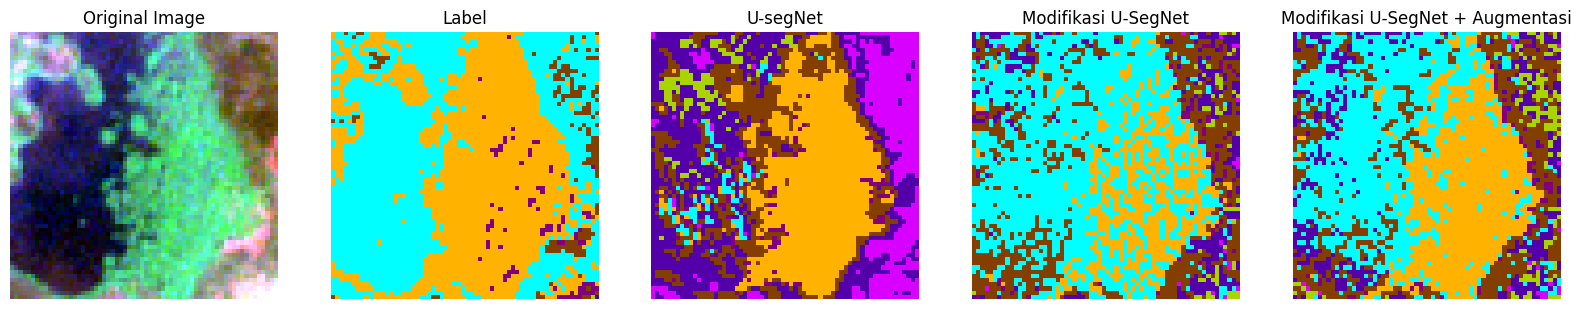

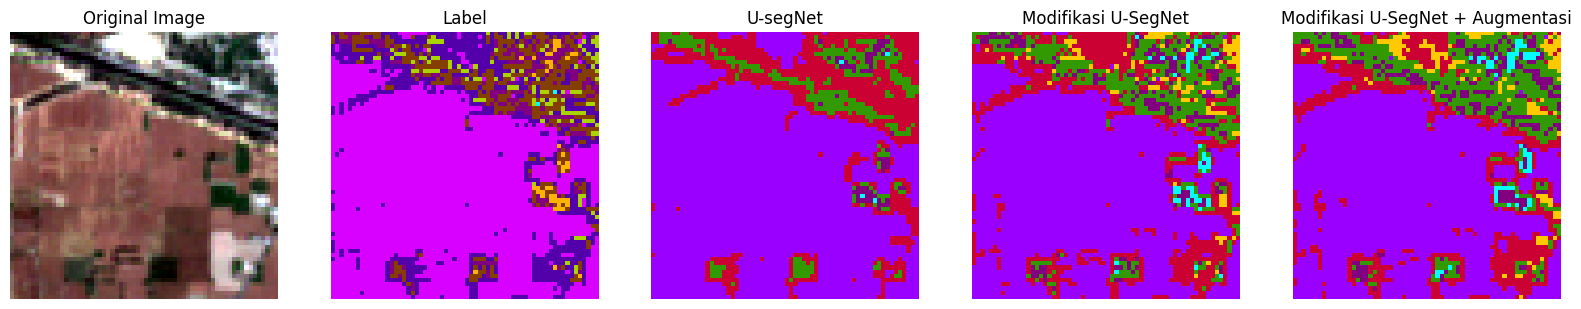

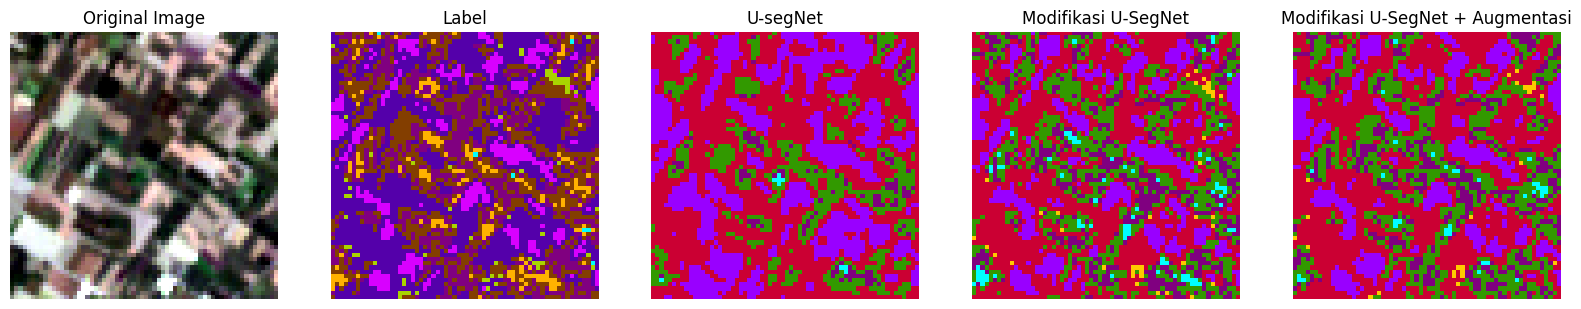

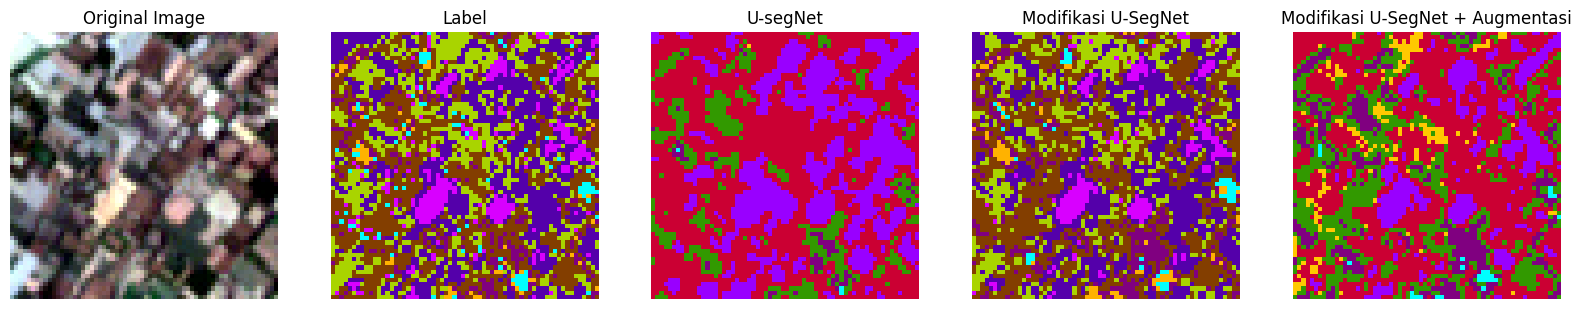

In [64]:
show_maps()

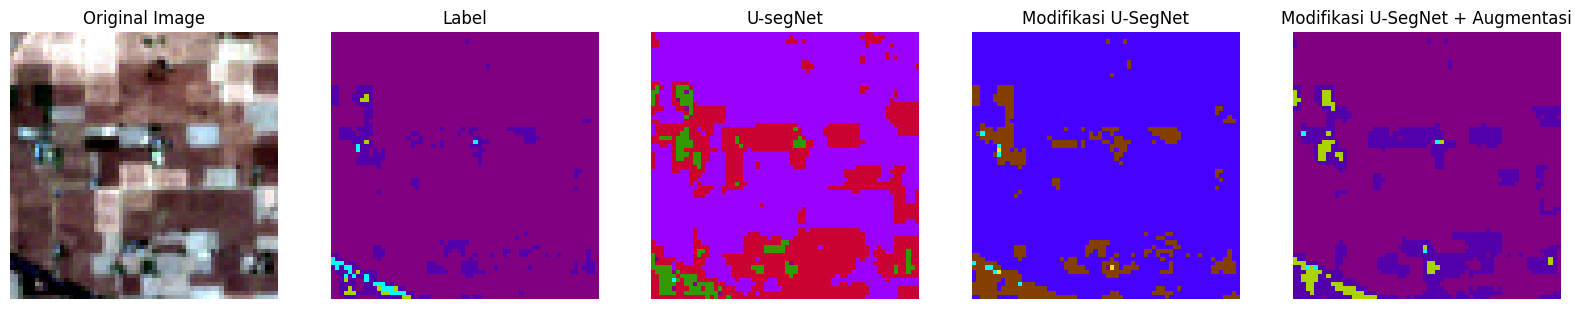

In [71]:
show_maps(n_images=1)